<H1> <align='Center'> Linear Regression Assignment </H1>
###########========================########### <br>
<b> Title           : </b> Linear Regression Assignment <br>
<b> Author          : </b> Surendra D M | Surbhi | Surej <br>
<b> Start Date      : </b> 09/07/2023 <br>
<b> Completion Date : </b> 14/07/2023<br>
<b> Python Version  : </b> 3.11.1 <br>
<b> Execution Time  : </b> 25 to 30 seconds <br>
###########========================########### <br>
File Path used is relative so include both the files in the same directory as the notebook for successful execution!

In [1]:
#Import all the required Libraries: 
#Define all the basic parameters for console / program:
import time
start = time.time()
#Set all the other Basic Parameters:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score
from sklearn import metrics
from sklearn.metrics import precision_recall_curve



In [2]:
Leads_Data = pd.read_csv("Leads.csv")

pd.set_option('display.max_columns',Leads_Data.shape[1])
pd.set_option('display.max_rows',200)

Leads_Data.head(20)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.00,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.00,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.00,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.00,Email Opened,India,IT Projects Management,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.00,Email Opened,India,Finance Management,Word Of Mouth,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [3]:
#Check the data 
Leads_Data.shape

(9240, 37)

In [4]:
Leads_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
Leads_Data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Start the EDA Work from here on

## Data Preperation

In [6]:
#Identify if there are any duplicates in the columns indicating the IDs
print("Lead Number Duplicates: " , sum(Leads_Data.duplicated(subset = 'Lead Number')))
print("Prospect ID  Duplicates: " , sum(Leads_Data.duplicated(subset = 'Prospect ID')))

Lead Number Duplicates:  0
Prospect ID  Duplicates:  0


<p> Both the below columns are Indeces and do not add value to the analysis hence can be dropped </p>
Strategy: Dropping / Renaming the columns that might not be required: 
<br> Columns in question:
<li> Lead Number </li>
<li> Prospect ID </li>


In [7]:
Leads_Data.drop(["Lead Number","Prospect ID"],inplace=True,axis=1)
Leads_Data.shape

(9240, 35)

In [8]:
#Observation shows that we have a lot of values that show as "Select", however they are as good as null.. hence replacing them with nan

Leads_Data = Leads_Data.replace('Select', np.nan)

In [9]:
#Let us now check the Null values in each column 
LeadDataLen = len(Leads_Data)
MissingValuePercentage = round(100*Leads_Data.isnull().sum()/LeadDataLen,2)
print(MissingValuePercentage)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

<p> Celarly there are a lot of columns that have missing values greater than 45% .. these columns might create a lot of data noise hence to reduce the data noise and better handling, let us drop these columns </p>
Strategy: Dropping / Renaming the columns that might not be required: 
<br> Columns in question:
<li> All Columns whose missing percentage is greater than 45% </li>


In [10]:
ColumnsMissing50p = list(MissingValuePercentage[MissingValuePercentage > 45].index)
print("Columns to be dropped: \n",ColumnsMissing50p)
#Concluding that these columns can be dropped.. 
# Dropping the columns that have more than 45% missing values
Leads_Data.drop(columns=ColumnsMissing50p,inplace=True)
print(Leads_Data.shape)

Columns to be dropped: 
 ['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']
(9240, 28)


In [11]:
#COntinuing the EDA for rest of the columns.
Leads_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [12]:
#we still see a lot of missing values.. let us evaluate the ones with most missing values and how to handle them: 
LeadDataLen = len(Leads_Data)
MissingValuePercentage = round(100*Leads_Data.isnull().sum()/LeadDataLen,2)
print(MissingValuePercentage)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [13]:
#Let us start with Country, City, Specialization, What is your Current occupation, what matters most to you in choosing a course , tags, city, 
#writing a function to visualise the data as well.

def ColumnAnalysis(Data,XAxis,YAxis="Converted",X_Label_Rotate=False,Height=6,Width=15,X_Label_RotateAngle=70,UseYLog=False):
    val_count = Data[XAxis].value_counts()
    df1 = pd.DataFrame({XAxis: val_count.index,'count': val_count.values})
    
    
    YAxis_Percentage = Data[[XAxis, YAxis]].groupby([XAxis],as_index=False).mean()
    YAxis_Percentage[YAxis] = YAxis_Percentage[YAxis]*100
    YAxis_Percentage.sort_values(by=YAxis,inplace = True)
        
        
# If the plot is not readable, use the log scale
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(Width,Height))

              
        
# 1. Subplot 1: Count plot of the column
    
    s = sns.countplot(data=Data,ax=ax1, x=XAxis, hue=YAxis)
    ax1.set_title(XAxis, fontsize = 10)
    ax1.legend(['Converted','NotConverted'])
    ax1.set_xlabel(XAxis,fontdict={'fontsize' : 10, 'fontweight' : 3})
    if(X_Label_Rotate):
        s.set_xticklabels(s.get_xticklabels(),rotation=X_Label_RotateAngle)
        
        
# 2. Subplot 2: Percentage of Converted within the column
        
    s = sns.barplot(ax=ax2, x = XAxis, y=YAxis, data=YAxis_Percentage)
    ax2.set_title("% of Converted in "+XAxis, fontsize = 10)    
    ax2.set_xlabel(XAxis,fontdict={'fontsize' : 10, 'fontweight' : 3})
    ax2.set_ylabel(YAxis,fontdict={'fontsize' : 10, 'fontweight' : 3})
    ax1.set_ylabel("Count",fontdict={'fontsize' : 10, 'fontweight' : 3})
    if(X_Label_Rotate):
        s.set_xticklabels(s.get_xticklabels(),rotation=X_Label_RotateAngle)
    
# use this variable if the plot is not readable:
    if UseYLog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 15, 'fontweight' : 3})
    else:
        ax1.set_ylabel("Count",fontdict={'fontsize' : 15, 'fontweight' : 3})
    plt.show()

In [14]:
#Analysing the column Country column

Leads_Data['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [15]:
#Majority of the values are India.. assuming that the missing values are in India we can proceed to replace the null values with India 
Leads_Data['Country'] = Leads_Data['Country'].replace(np.nan,'India')

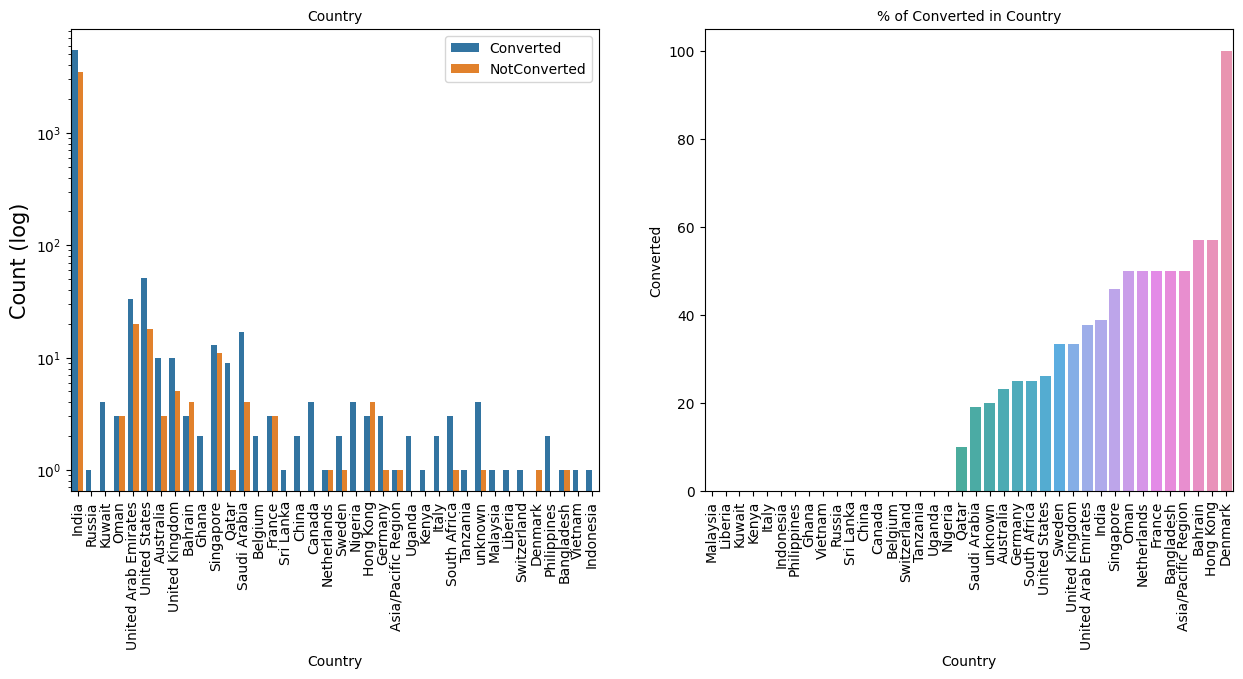

In [16]:
#As the data has lot of outliers - using logarithmic representation for better view of data in graph
ColumnAnalysis(Data=Leads_Data,XAxis="Country",X_Label_Rotate=True,X_Label_RotateAngle=90,UseYLog=True)

<p> From the above  </p>
<li> Conversion rate seem to be highest for Asia Pacific and Middle East countries</li>
<li> European nations have moderate convesion percentage</li>
<li> Considering the data distribution however, we are looking at dropping the country column </li>

In [17]:
#analysing the column City 
Leads_Data['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [18]:
#there are a lot of missing values and they can probably be imputed with the value as Other or City column can be dropped.. however, let us first evaluate: 
Leads_Data['City'] = Leads_Data['City'].replace(np.nan,'Mumbai')

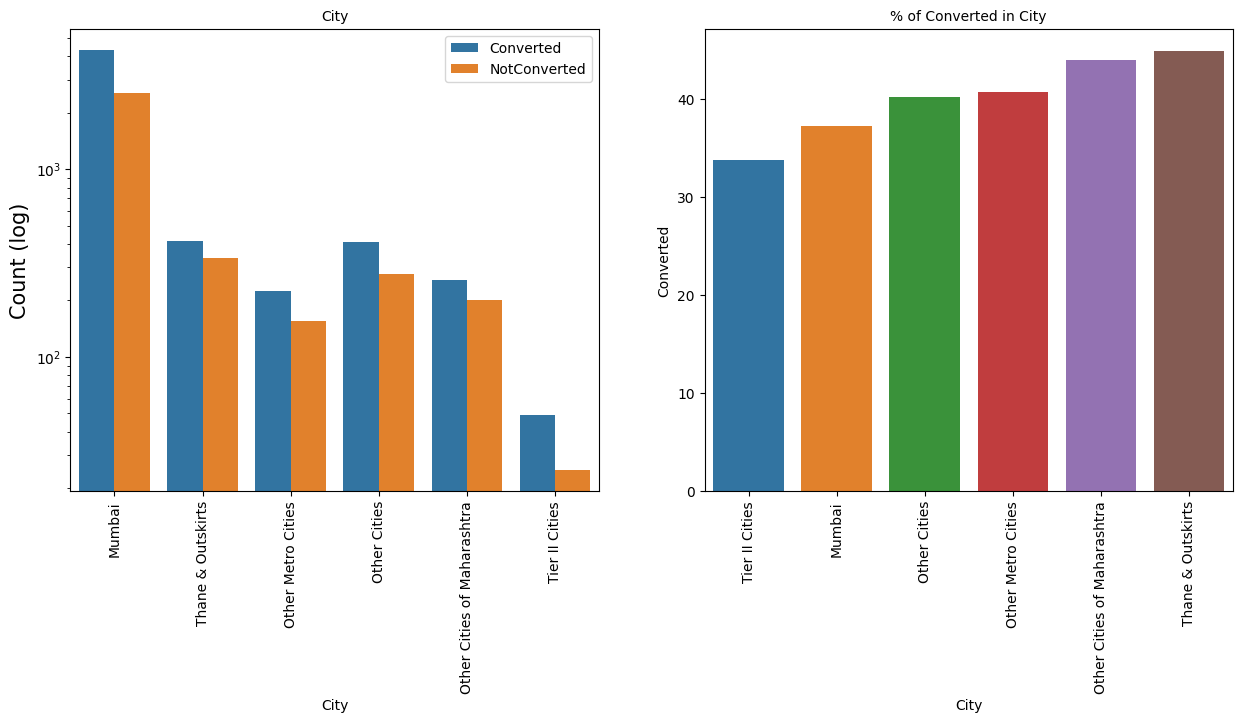

In [19]:
#Plotting the graph to check the distribution - using logarithmic representation for better view of data in graph
ColumnAnalysis(Data=Leads_Data,XAxis="City",X_Label_Rotate=True,X_Label_RotateAngle=90,UseYLog=True)

<p> From the above  </p>
<li> We see that the most number of people converted is from Mumbai, but the conversion percentage is high in Thane and Outskirts. </li>


In [20]:
#Analysing the column Specialization: 

Leads_Data['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [21]:
#Let us replace the Nan with 'Not Provided'
Leads_Data['Specialization'] = Leads_Data['Specialization'].replace(np.nan,'Not Provided')

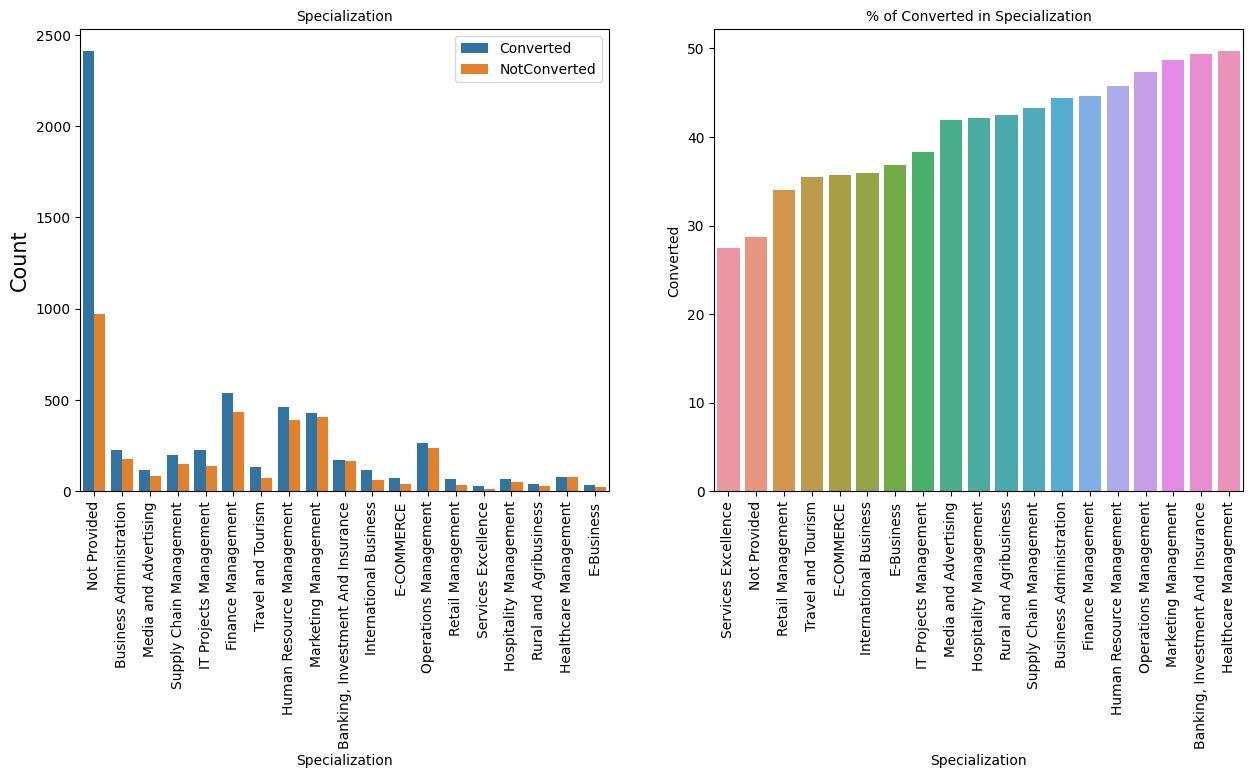

In [22]:
#Plotting the graph to check the distribution - using logarithmic representation for better view of data in graph
ColumnAnalysis(Data=Leads_Data,XAxis="Specialization",X_Label_Rotate=True,X_Label_RotateAngle=90)

<p> From the above  </p>
<li> Conversion rate seem to be very good for potential candidates in management</li>
<li> potential candidates who have not specified their specialization do not seem to look very promising</li>


In [23]:
#Analysing the column 'What is your current occupation'
Leads_Data['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [24]:
#Let us impute the values of NaN with 'Unemployed'
Leads_Data['What is your current occupation'] = Leads_Data['What is your current occupation'].replace(np.nan,'Unemployed')

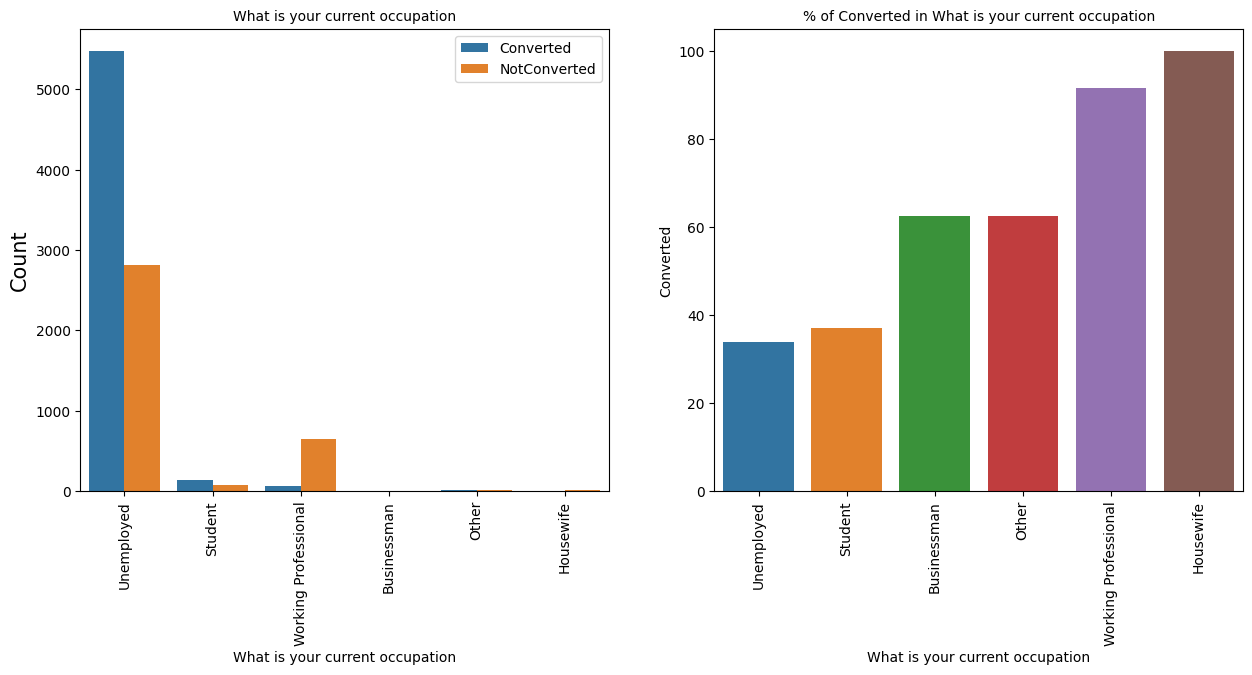

In [25]:
#Plotting the graph to check the distribution - using logarithmic representation for better view of data in graph
ColumnAnalysis(Data=Leads_Data,XAxis="What is your current occupation",X_Label_Rotate=True,X_Label_RotateAngle=90)

<p> From the above  </p>
<li> Conversion rate seem to be very good for Working professionals, HouseWives, Businessman, Other</li>
<li> potential candidates who have not specified their specialization do not seem to look very promising</li>


In [26]:
#Analysing the column - "What matters most to you in choosing a course"
Leads_Data['What matters most to you in choosing a course'].value_counts(dropna=False)
#It is best to drop this column as more than 97% of the data is 'Better Career Prospects' - hence it will be meaningless to impute this

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [27]:
#Analysing the column - Tags
Leads_Data['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [28]:
#Let us impute the values of NaN with 'Not Provided'
Leads_Data['Tags'] = Leads_Data['Tags'].replace(np.nan,'Not Provided')

#Combining the Tags with low frequency into a class named 'Others' for better analysis
#replacing tags with low frequency with "Other Tags"
Leads_Data['Tags'] = Leads_Data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized','switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'], 'Other')


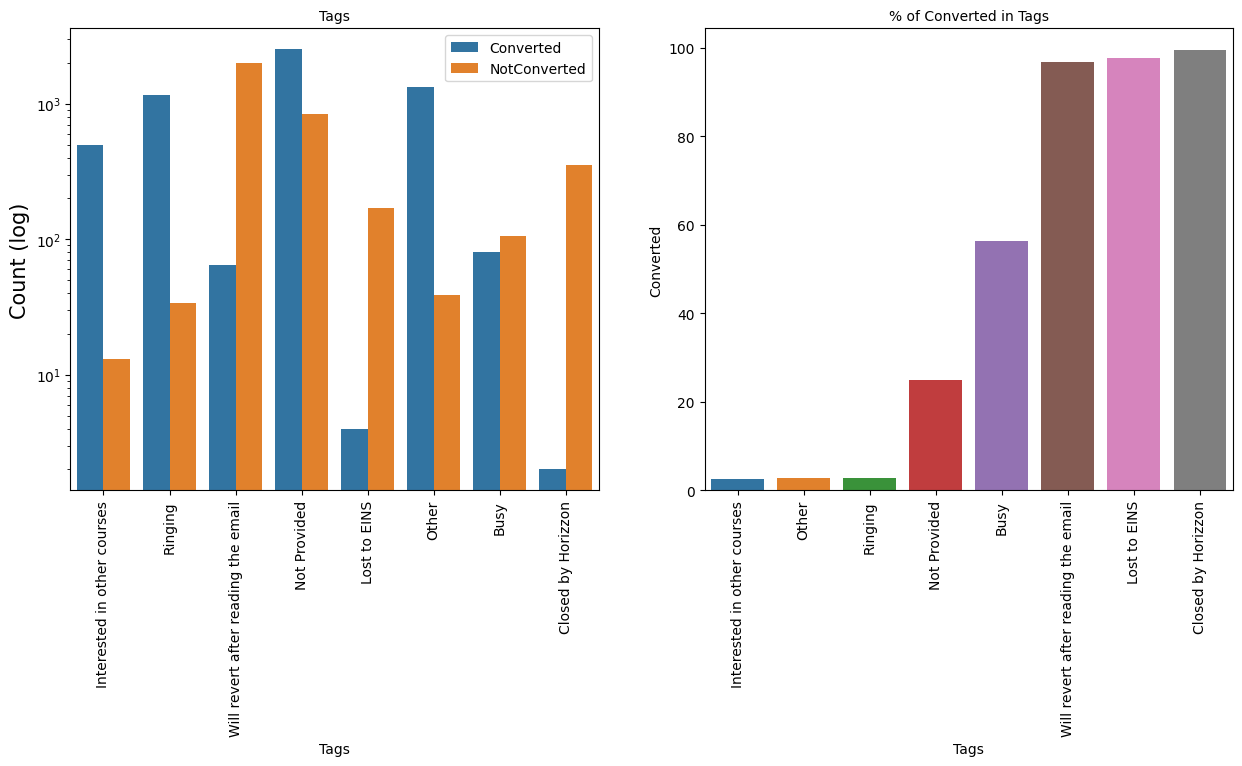

In [29]:
#Plotting the graph to check the distribution - using logarithmic representation for better view of data in graph
ColumnAnalysis(Data=Leads_Data,XAxis="Tags",X_Label_Rotate=True,X_Label_RotateAngle=90,UseYLog=True)

In [30]:
#Analysing the column - Lead Source
Leads_Data['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [31]:
# certain values can be imputed and perhaps clubbed together let us see how we can do it:
Leads_Data['Lead Source'] = Leads_Data['Lead Source'].replace(np.nan,'Others')
Leads_Data['Lead Source'] = Leads_Data['Lead Source'].replace('google','Google')
Leads_Data['Lead Source'] = Leads_Data['Lead Source'].replace('Facebook','Social Media')
Leads_Data['Lead Source'] = Leads_Data['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')                                                   

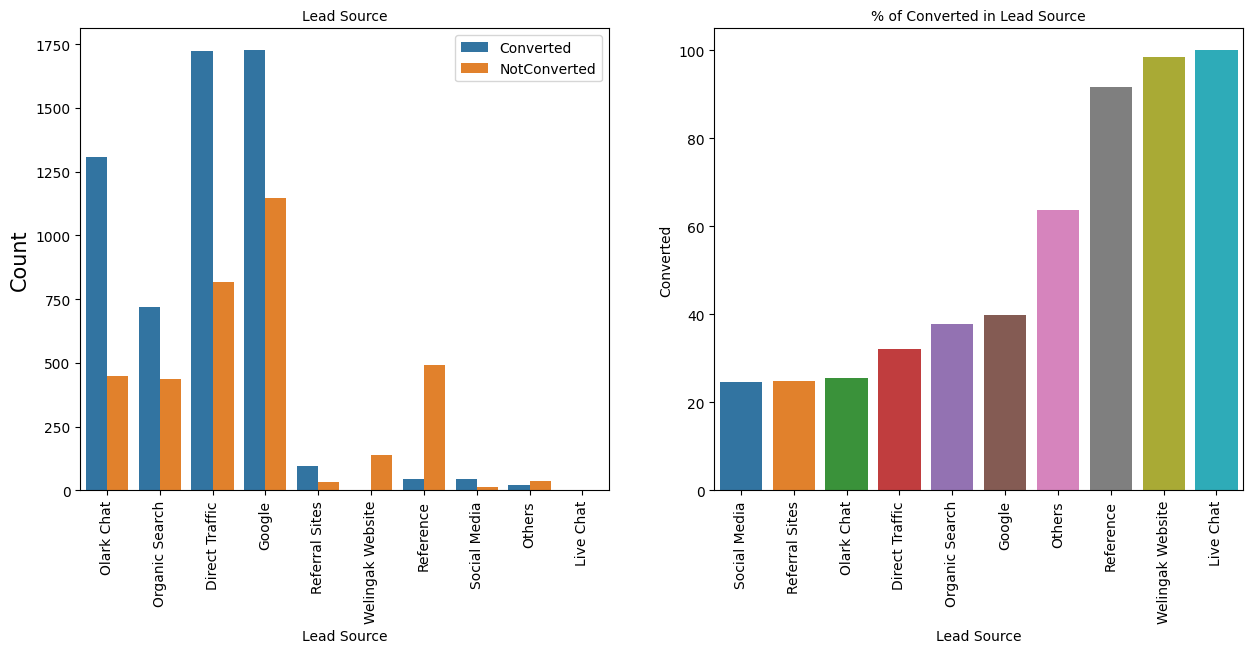

In [32]:
#Plotting the graph to check the distribution - using logarithmic representation for better view of data in graph
ColumnAnalysis(Data=Leads_Data,XAxis="Lead Source",X_Label_Rotate=True,X_Label_RotateAngle=90,UseYLog=False)

<p> From the above  </p>
<li> Conversion rate seem to be very good for folks that come through Reference, Google, Others, Welingak Website</li>
<li> LiveChat although shows high conversion .. the number of candidates influx is very low</li>


In [33]:
#Analysing the column - Last Activity
Leads_Data['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [34]:
#Grouping some data with lower frequency as others and perhaps handling missing values as others too
Leads_Data['Last Activity'] = Leads_Data['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow',np.nan],'Others')

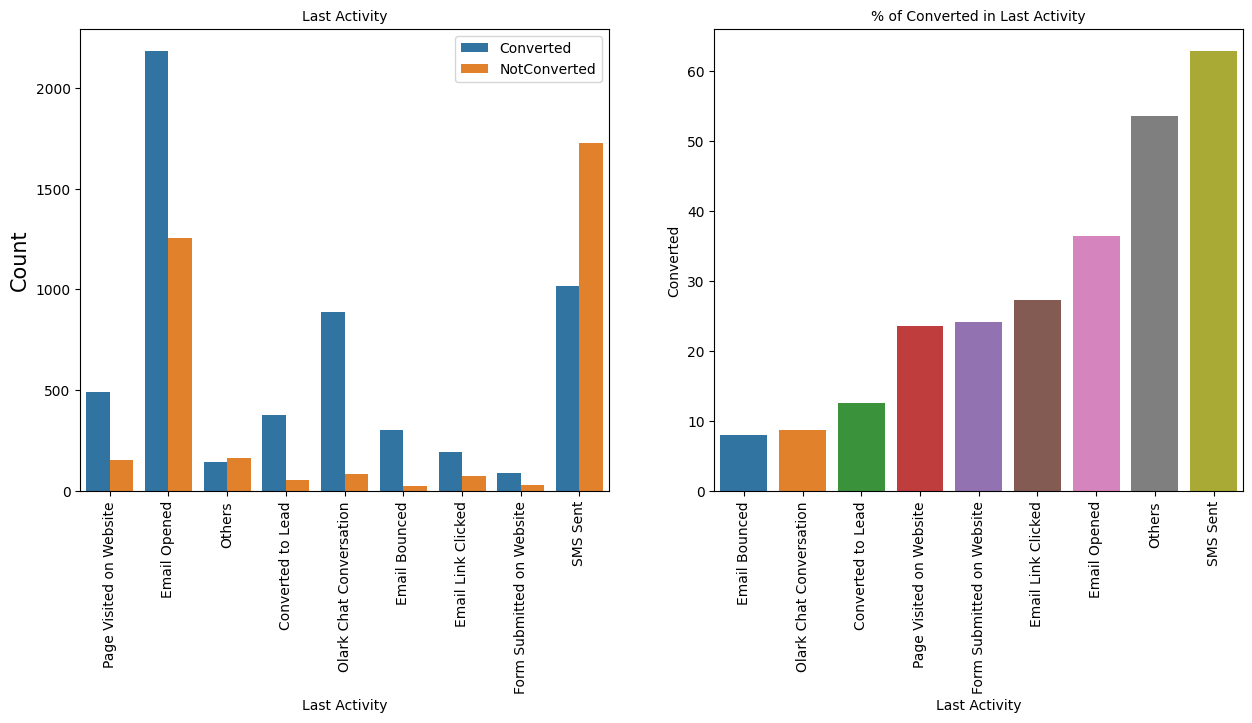

In [35]:
#Plotting the graph to check the distribution - using logarithmic representation for better view of data in graph
ColumnAnalysis(Data=Leads_Data,XAxis="Last Activity",X_Label_Rotate=True,X_Label_RotateAngle=90,UseYLog=False)

<p> From the above  </p>
<li> Conversion rate seem to be very good for folks that have last activity as: SMS Sent, Others, Email Opened, Email Link Clicked</li>



In [36]:
#Before we proceed further, let us make a decision on the columns to be dropped: 
ColumnsToDrop = ['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque', "City"]

Leads_Data.drop(ColumnsToDrop,axis=1,inplace=True)

In [37]:
#Let us now check for missing data / null values again to see if any actions can be performed: 
LeadDataLen = len(Leads_Data)
MissingValuePercentage = round(100*Leads_Data.isnull().sum()/LeadDataLen,2)
print(MissingValuePercentage) 

Lead Origin                               0.00
Lead Source                               0.00
Do Not Email                              0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             0.00
Specialization                            0.00
What is your current occupation           0.00
Tags                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64


In [38]:
#since the percentage of missing values for the rest of the data now is less than 1.5% let us drop those rows: 
Leads_Data.dropna(inplace=True)

In [39]:
LeadDataLen = len(Leads_Data)
MissingValuePercentage = round(100*Leads_Data.isnull().sum()/LeadDataLen,2)
print(MissingValuePercentage) 

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64


## Numerical columns analysis


In [40]:
#TO begin with let us check the total conversion percentage: 
Converted = (sum(Leads_Data['Converted'])/len(Leads_Data['Converted'].index))*100
print(Converted)

38.02043282434362


C:\Users\NotAPro\AppData\Local\Temp\ipykernel_4728\2512832407.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Leads_Data.corr(), cmap="YlGnBu", annot=True)


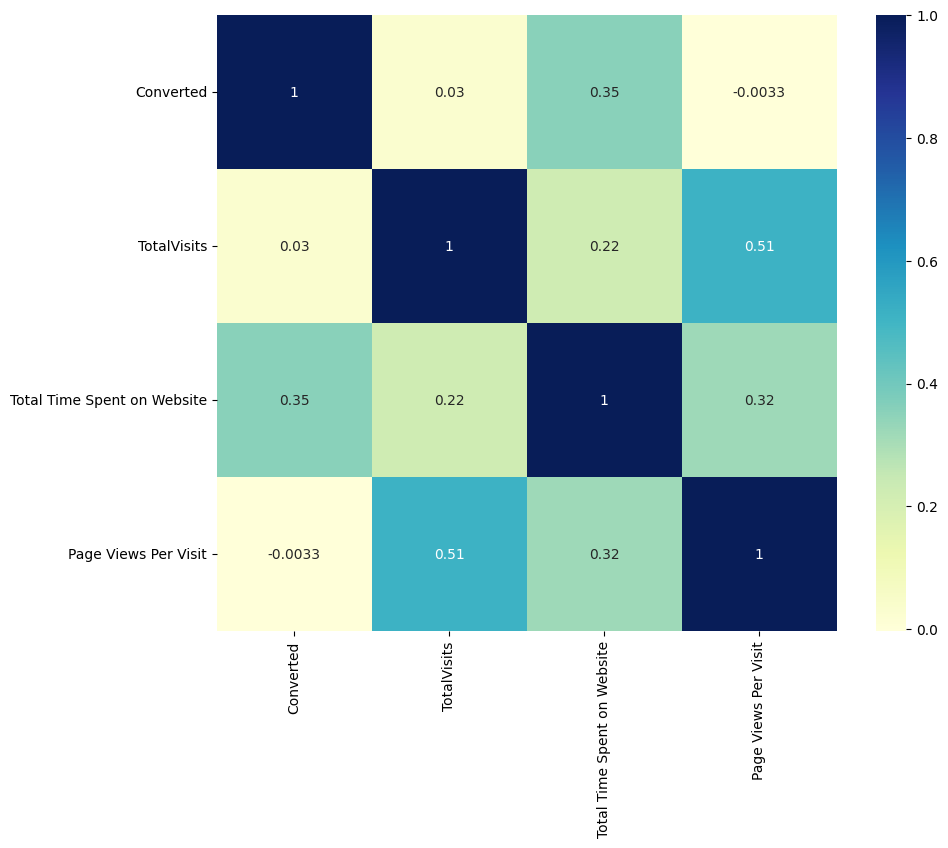

In [41]:
#Let us now check the correlation of the columns in question
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(Leads_Data.corr(), cmap="YlGnBu", annot=True)
plt.show()

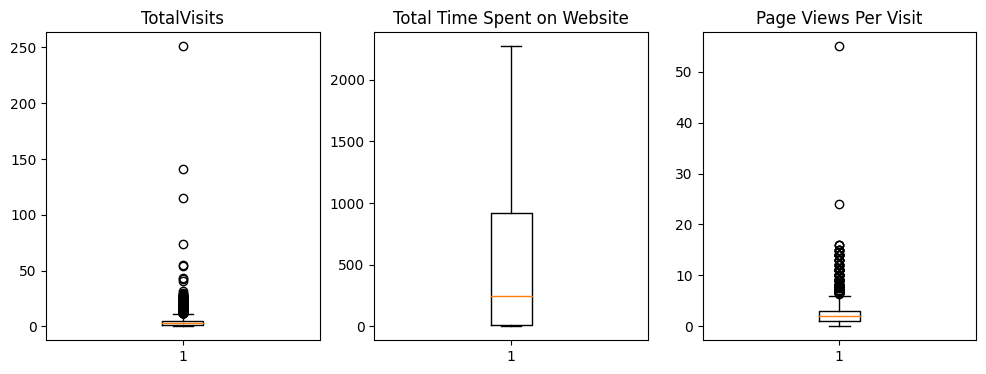

In [42]:
#BoxPlot for Outlier check: 

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].boxplot(Leads_Data["TotalVisits"])
axes[0].set_title('TotalVisits')

axes[1].boxplot(Leads_Data["Total Time Spent on Website"])
axes[1].set_title('Total Time Spent on Website')

axes[2].boxplot(Leads_Data["Page Views Per Visit"])
axes[2].set_title('Page Views Per Visit')

plt.show()


In [43]:
print(Leads_Data.TotalVisits.describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99]))
print(Leads_Data["Total Time Spent on Website"].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99]))
print(Leads_Data["Page Views Per Visit"].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99]))

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64
count    9103.000000
mean      481.350104
std       545.066142
min         0.000000
5%          0.000000
25%         9.000000
50%       244.000000
75%       919.500000
90%      1372.000000
95%      1556.900000
99%      1838.960000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64
count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64


In [44]:
#Outliers are seen across the variables.. let us handle the outliers we will consider removing top 3% and bottom 1% across these variables 
#Page Views Per Visit , TotalVisits

Q3 = Leads_Data['Page Views Per Visit'].quantile(0.97)
Leads_Data = Leads_Data[Leads_Data['Page Views Per Visit'] <= Q3]
Q1 = Leads_Data['Page Views Per Visit'].quantile(0.01)
Leads_Data = Leads_Data[Leads_Data['Page Views Per Visit'] >= Q1]

Q3 = Leads_Data['TotalVisits'].quantile(0.97)
Leads_Data = Leads_Data[Leads_Data['TotalVisits'] <= Q3]
Q1 = Leads_Data['TotalVisits'].quantile(0.01)
Leads_Data = Leads_Data[Leads_Data['TotalVisits'] >= Q1]

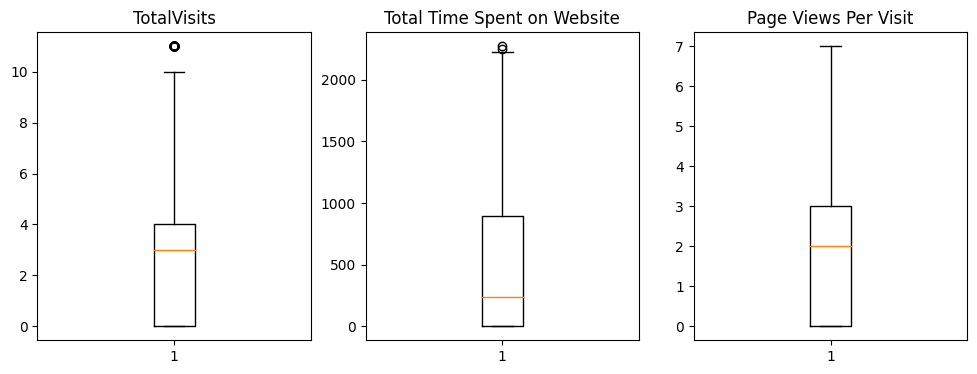

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].boxplot(Leads_Data["TotalVisits"])
axes[0].set_title('TotalVisits')

axes[1].boxplot(Leads_Data["Total Time Spent on Website"])
axes[1].set_title('Total Time Spent on Website')

axes[2].boxplot(Leads_Data["Page Views Per Visit"])
axes[2].set_title('Page Views Per Visit')

plt.show()

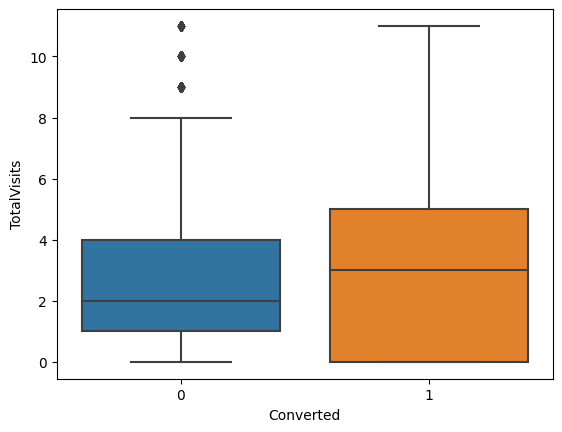

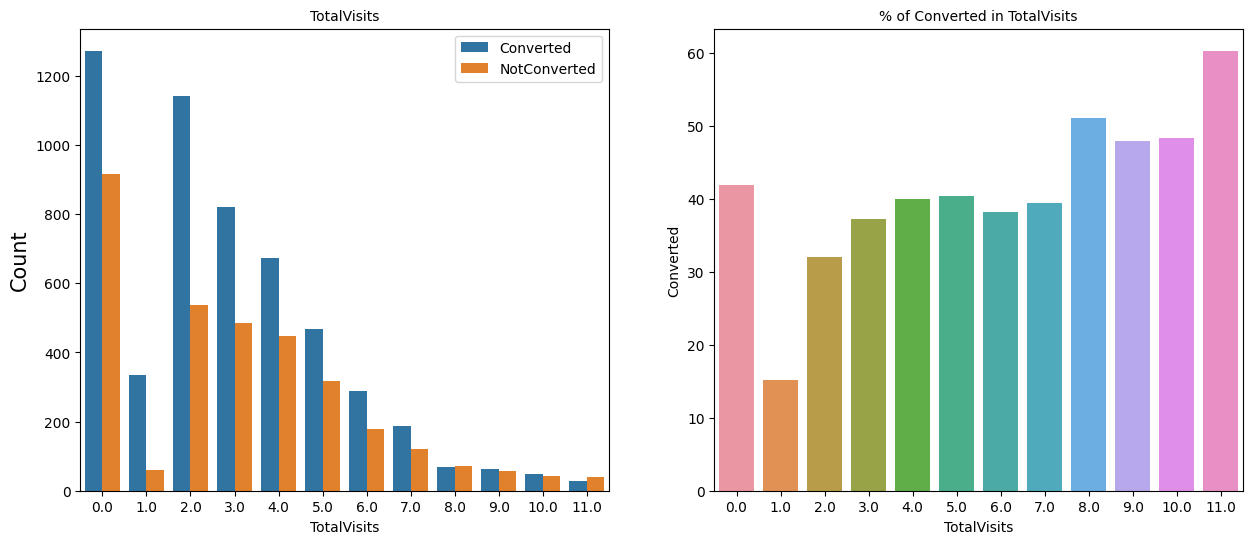

In [46]:
#Outlier situation is much better now 
#Doing Bar Graph analysis for this as this gives a clearer picture as to why TotalVisits maybe irrelevant / insignifcant
sns.boxplot(x=Leads_Data.Converted,y=Leads_Data['TotalVisits'])
ColumnAnalysis(Leads_Data,XAxis="TotalVisits")

<p> From the above  </p>
<li> Total Visits do not seem to infuence conversion as folks who have not visited the site at all are also getting converted and their number is high as well</li>



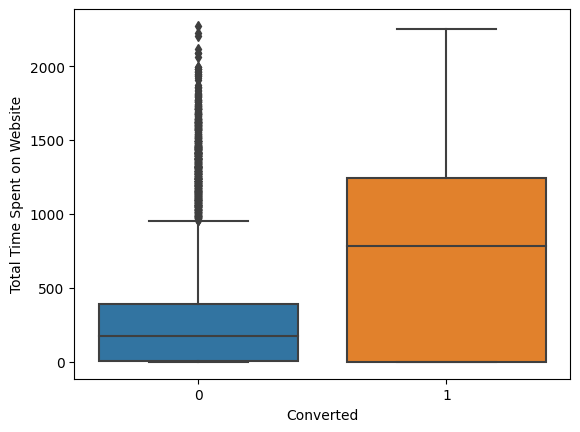

In [47]:
sns.boxplot(x=Leads_Data.Converted, y=Leads_Data['Total Time Spent on Website'])
plt.show()

<p> From the above  </p>
<li> The time spent on website has some impact on the converted ratio.. as the median for converted ratio is higher</li>



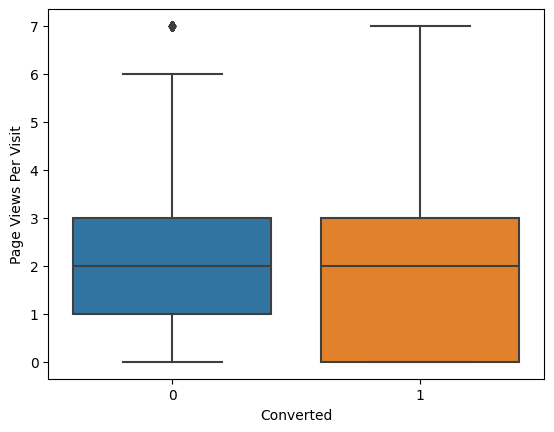

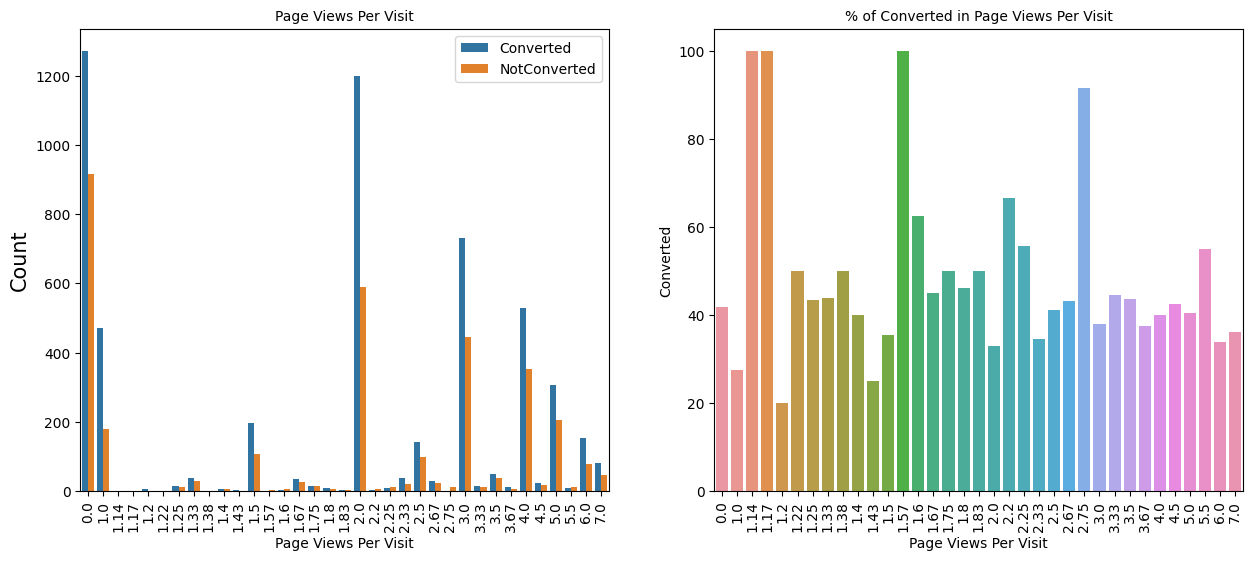

In [48]:
sns.boxplot(x=Leads_Data.Converted,y=Leads_Data['Page Views Per Visit'])
ColumnAnalysis(Leads_Data,XAxis="Page Views Per Visit",X_Label_Rotate=True,X_Label_RotateAngle=90)
plt.show()

<p> From the above  </p>
<li> Median for converted and unconverted leads is the same.</li>
<li> Nothing can be said specifically for lead conversion from Page Views Per Visit</li>

## Dummy Variables Creation 

In [49]:
#getting a list of categorical columns

cat_cols= Leads_Data.select_dtypes(include=['object']).columns
print(cat_cols)

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


In [50]:
#Mapping the variables with 1 and 0 

# List of variables to map

ColumnsForYesNoMap =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def YesNoMap(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
Leads_Data[ColumnsForYesNoMap] = Leads_Data[ColumnsForYesNoMap].apply(YesNoMap)

In [51]:
cat_var = ["Lead Origin", "Lead Source", "Last Activity", "Specialization","What is your current occupation","Tags",  "Last Notable Activity"]

## Creating Dummy variables
Dummy= pd.get_dummies(Leads_Data[cat_var], drop_first= True)

Leads_Data= pd.concat([Leads_Data, Dummy], axis=1)  #Concatenating Dummy with Leads dataframe
Leads_Data= Leads_Data.drop(cat_var, axis=1)  # Dropping the variables

In [52]:
Leads_Data.head(10)

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,...,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6,0,1,2.0,1640,2.0,0,1,0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8,0,0,2.0,71,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9,0,0,4.0,58,4.0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


## Train-Test Split & Logistic Regression Model Building:

In [53]:
X=Leads_Data.drop(["Converted"], axis=1)
y= Leads_Data["Converted"]

In [54]:
X_train,X_test, y_train, y_test= train_test_split(X,y, train_size= 0.7, random_state=100)  #Splitting data into Train and Test Data

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,...,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
6366,-0.288133,-1.162892,-0.871496,-1.230148,-0.660363,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8007,-0.288133,0.054102,-0.239767,0.483314,-0.660363,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8391,-0.288133,0.054102,-0.720909,0.483314,1.514318,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7039,-0.288133,-1.162892,-0.871496,-1.230148,-0.660363,0,1,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5196,-0.288133,-0.351563,-0.847622,-0.658994,-0.660363,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [56]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,...,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
6366,-0.288133,-1.162892,-0.871496,-1.230148,-0.660363,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8007,-0.288133,0.054102,-0.239767,0.483314,-0.660363,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8391,-0.288133,0.054102,-0.720909,0.483314,1.514318,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7039,-0.288133,-1.162892,-0.871496,-1.230148,-0.660363,0,1,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5196,-0.288133,-0.351563,-0.847622,-0.658994,-0.660363,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Model Building using Stats Model & RFE:

In [57]:
logreg = LogisticRegression()


rfe = RFE(estimator=logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

C:\Users\NotAPro\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\NotAPro\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

In [58]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))
ColumnsForModelling = X_train.columns[rfe.support_]
print(ColumnsForModelling)

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_SMS Sent',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Email Bounced', 'Last Notable Activity_Modified',
       'Last Notable Activity_SMS Sent'],
      dtype='object')


In [59]:
X_train_sm = sm.add_constant(X_train[ColumnsForModelling])
LRModel1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = LRModel1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6066
Model:                            GLM   Df Residuals:                     6050
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1193.5
Date:                Mon, 17 Jul 2023   Deviance:                       2387.1
Time:                        17:12:31   Pearson chi2:                 9.23e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6085
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.7262      0.102    -16.938      0.000      -1.926      -1.526
Total Time Spent on Website                  1.0490      0.063     16.627      0.000       0.925       1.173
Lead Origin_Lead Add Form                    2.1322      0.441      4.835      0.000       1.268       2.997
Lead Source_Olark Chat                       1.1754      0.147      7.970      0.000       0.886       1.464
Lead Source_Welingak Website                 3.8463      1.111      3.462      0.001       1.669       6.024
Last Activity_Email Bounced                 -1.8158      0.708     -2.565      0.010      -3.203      -0.428
Last Activity_SMS Sent                       1.4186      0.233      6.092      0.000       0.962       1.875
Tags_Closed by Horizzon                      6.2595      0.738      8.486      0.000       4.814       7.705
Tags_Interested in other courses            -2.0648      0.441     -4.683      0.000      -2.929      -1.201
Tags_Lost to EINS                            6.1175      0.740      8.271      0.000       4.668       7.567
Tags_Other                                  -2.5610      0.227    -11.275      0.000      -3.006      -2.116
Tags_Ringing                                -3.5219      0.252    -13.992      0.000      -4.015      -3.029
Tags_Will revert after reading the email     4.5592      0.194     23.469      0.000       4.178       4.940
Last Notable Activity_Email Bounced          1.5017      0.961      1.562      0.118      -0.382       3.386
Last Notable Activity_Modified              -1.3570      0.159     -8.519      0.000      -1.669      -1.045
Last Notable Activity_SMS Sent               0.8196      0.266      3.085      0.002       0.299       1.340
============================================================================================================
"""

In [60]:
#Dropping the columns with high P value
ColumnsForModelling = ColumnsForModelling.drop("Last Notable Activity_Email Bounced",1)
ColumnsForModelling


Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_SMS Sent',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [61]:
#Building Model#2

X_train_sm = sm.add_constant(X_train[ColumnsForModelling])
LRModel2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = LRModel2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6066
Model:                            GLM   Df Residuals:                     6051
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1194.7
Date:                Mon, 17 Jul 2023   Deviance:                       2389.5
Time:                        17:12:31   Pearson chi2:                 8.92e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6084
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.7168      0.102    -16.903      0.000      -1.916      -1.518
Total Time Spent on Website                  1.0490      0.063     16.637      0.000       0.925       1.173
Lead Origin_Lead Add Form                    2.1326      0.441      4.841      0.000       1.269       2.996
Lead Source_Olark Chat                       1.1788      0.147      7.996      0.000       0.890       1.468
Lead Source_Welingak Website                 3.8972      1.113      3.501      0.000       1.716       6.079
Last Activity_Email Bounced                 -1.1156      0.494     -2.258      0.024      -2.084      -0.147
Last Activity_SMS Sent                       1.4448      0.233      6.211      0.000       0.989       1.901
Tags_Closed by Horizzon                      6.2832      0.738      8.519      0.000       4.838       7.729
Tags_Interested in other courses            -2.0537      0.441     -4.656      0.000      -2.918      -1.189
Tags_Lost to EINS                            6.0629      0.732      8.281      0.000       4.628       7.498
Tags_Other                                  -2.5571      0.227    -11.255      0.000      -3.002      -2.112
Tags_Ringing                                -3.5224      0.252    -13.998      0.000      -4.016      -3.029
Tags_Will revert after reading the email     4.5502      0.193     23.516      0.000       4.171       4.929
Last Notable Activity_Modified              -1.3928      0.158     -8.807      0.000      -1.703      -1.083
Last Notable Activity_SMS Sent               0.7831      0.265      2.957      0.003       0.264       1.302
============================================================================================================
"""

In [62]:
#Removing Last Activity_Email Bounced as it has higher p value for better analysis

#Dropping the columns with high P value
ColumnsForModelling = ColumnsForModelling.drop("Last Activity_Email Bounced",1)
ColumnsForModelling

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS', 'Tags_Other',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [63]:
#Building Model 3

X_train_sm = sm.add_constant(X_train[ColumnsForModelling])
LRModel3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = LRModel3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6066
Model:                            GLM   Df Residuals:                     6052
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1197.8
Date:                Mon, 17 Jul 2023   Deviance:                       2395.6
Time:                        17:12:31   Pearson chi2:                 8.79e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6080
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.7381      0.101    -17.137      0.000      -1.937      -1.539
Total Time Spent on Website                  1.0481      0.063     16.653      0.000       0.925       1.171
Lead Origin_Lead Add Form                    2.1377      0.440      4.853      0.000       1.274       3.001
Lead Source_Olark Chat                       1.1908      0.147      8.088      0.000       0.902       1.479
Lead Source_Welingak Website                 3.8520      1.112      3.465      0.001       1.673       6.031
Last Activity_SMS Sent                       1.5181      0.231      6.569      0.000       1.065       1.971
Tags_Closed by Horizzon                      6.3126      0.738      8.550      0.000       4.865       7.760
Tags_Interested in other courses            -2.0320      0.441     -4.605      0.000      -2.897      -1.167
Tags_Lost to EINS                            6.0626      0.731      8.294      0.000       4.630       7.495
Tags_Other                                  -2.5614      0.227    -11.289      0.000      -3.006      -2.117
Tags_Ringing                                -3.5166      0.252    -13.970      0.000      -4.010      -3.023
Tags_Will revert after reading the email     4.5707      0.193     23.629      0.000       4.192       4.950
Last Notable Activity_Modified              -1.4479      0.157     -9.239      0.000      -1.755      -1.141
Last Notable Activity_SMS Sent               0.7276      0.264      2.756      0.006       0.210       1.245
============================================================================================================
"""

<p> this model looks to be good for Further evaluation </p>
<p> let us now check the VIF to check the correlation between the variables / columns </p>

In [64]:
# Check for the VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = X_train[ColumnsForModelling].columns
vif['VIF'] = [variance_inflation_factor(X_train[ColumnsForModelling].values, i) for i in range(X_train[ColumnsForModelling].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

,Features,VIF
12,Last Notable Activity_SMS Sent,6.11
4,Last Activity_SMS Sent,5.98
11,Last Notable Activity_Modified,1.83
1,Lead Origin_Lead Add Form,1.81
10,Tags_Will revert after reading the email,1.63
0,Total Time Spent on Website,1.48
2,Lead Source_Olark Chat,1.43
3,Lead Source_Welingak Website,1.28
5,Tags_Closed by Horizzon,1.22
8,Tags_Other,1.16


In [65]:
#Last Notable Activity SMS sent and Last Activity SMS Sent seems to have high correlation .. let us remove Last Notable Activity_SMS Sent as it has higher VIF value
ColumnsForModelling = ColumnsForModelling.drop(['Last Notable Activity_SMS Sent'],1)

In [66]:
#Building Model 4

X_train_sm = sm.add_constant(X_train[ColumnsForModelling])
LRModel4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = LRModel4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6066
Model:                            GLM   Df Residuals:                     6053
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1201.6
Date:                Mon, 17 Jul 2023   Deviance:                       2403.3
Time:                        17:12:31   Pearson chi2:                 8.98e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6075
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.6877      0.099    -17.076      0.000      -1.881      -1.494
Total Time Spent on Website                  1.0432      0.063     16.642      0.000       0.920       1.166
Lead Origin_Lead Add Form                    2.1067      0.443      4.759      0.000       1.239       2.974
Lead Source_Olark Chat                       1.2068      0.146      8.254      0.000       0.920       1.493
Lead Source_Welingak Website                 3.8746      1.115      3.474      0.001       1.688       6.061
Last Activity_SMS Sent                       2.0663      0.118     17.531      0.000       1.835       2.297
Tags_Closed by Horizzon                      6.4846      0.739      8.779      0.000       5.037       7.932
Tags_Interested in other courses            -1.9945      0.442     -4.509      0.000      -2.862      -1.128
Tags_Lost to EINS                            6.2029      0.732      8.470      0.000       4.768       7.638
Tags_Other                                  -2.5153      0.225    -11.193      0.000      -2.956      -2.075
Tags_Ringing                                -3.4238      0.247    -13.855      0.000      -3.908      -2.939
Tags_Will revert after reading the email     4.6397      0.195     23.738      0.000       4.257       5.023
Last Notable Activity_Modified              -1.7161      0.129    -13.313      0.000      -1.969      -1.463
============================================================================================================
"""

In [67]:
vif = pd.DataFrame()
vif['Features'] = X_train[ColumnsForModelling].columns
vif['VIF'] = [variance_inflation_factor(X_train[ColumnsForModelling].values, i) for i in range(X_train[ColumnsForModelling].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

,Features,VIF
1,Lead Origin_Lead Add Form,1.81
10,Tags_Will revert after reading the email,1.59
0,Total Time Spent on Website,1.48
11,Last Notable Activity_Modified,1.48
4,Last Activity_SMS Sent,1.46
2,Lead Source_Olark Chat,1.40
3,Lead Source_Welingak Website,1.28
5,Tags_Closed by Horizzon,1.22
8,Tags_Other,1.14
6,Tags_Interested in other courses,1.12


### VIF score also looks good on this model .. we will go with final model#4 for evaluation

Moving on to derive the Probabilities, Lead Score, Predictions on Train Data:

In [68]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6366    0.042850
8007    0.025235
8391    0.986159
7039    0.967212
5196    0.984234
8044    0.999560
472     0.988313
1664    0.000799
7416    0.003606
4223    0.998006
dtype: float64

In [69]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head() 

,Converted,Converted_prob,Prospect ID
6366,0,0.042850,6366
8007,0,0.025235,8007
8391,1,0.986159,8391
7039,1,0.967212,7039
5196,1,0.984234,5196


In [70]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
6366,0,0.042850,6366,0
8007,0,0.025235,8007,0
8391,1,0.986159,8391,1
7039,1,0.967212,7039,1
5196,1,0.984234,5196,1


## Calculating the various metrics

In [71]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3590  151]
 [ 294 2031]]


In [72]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9266402901417738


In [73]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [74]:
# Let's see the all other metrics of our logistic regression model

print("Sensitivity ", TP / float(TP+FN))
print("Specificity ", TN / float(TN+FP))
print("False Positive Rate",FP/ float(TN+FP))
print("Positive Predictive Value",TP / float(TP+FP))
print("Negative Predictive Value",TN / float(TN+ FN))


Sensitivity  0.8735483870967742
Specificity  0.9596364608393477
False Positive Rate 0.04036353916065223
Positive Predictive Value 0.9307974335472043
Negative Predictive Value 0.9243048403707518


### Plotting the ROC curve  

In [75]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [76]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

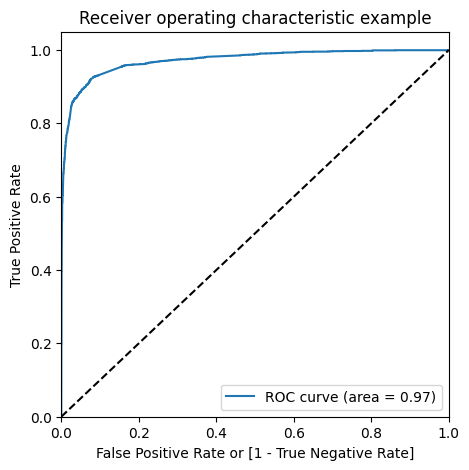

In [77]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

<p> The ROC Curve should be a value close to 1. We are getting a good value of 0.97 indicating a good predictive model.

### FInding optimal cut off point

we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value

In [78]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head() 

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
6366,0,0.042850,6366,0,1,0,0,0,0,0,0,0,0,0
8007,0,0.025235,8007,0,1,0,0,0,0,0,0,0,0,0
8391,1,0.986159,8391,1,1,1,1,1,1,1,1,1,1,1
7039,1,0.967212,7039,1,1,1,1,1,1,1,1,1,1,1
5196,1,0.984234,5196,1,1,1,1,1,1,1,1,1,1,1


In [79]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.383284  1.000000  0.000000
0.1   0.1  0.829871  0.969892  0.742850
0.2   0.2  0.914441  0.930753  0.904304
0.3   0.3  0.922519  0.914839  0.927292
0.4   0.4  0.924497  0.897204  0.941460
0.5   0.5  0.926640  0.873548  0.959636
0.6   0.6  0.927300  0.856344  0.971398
0.7   0.7  0.913122  0.805591  0.979952
0.8   0.8  0.906198  0.781075  0.983962
0.9   0.9  0.885757  0.716559  0.990912


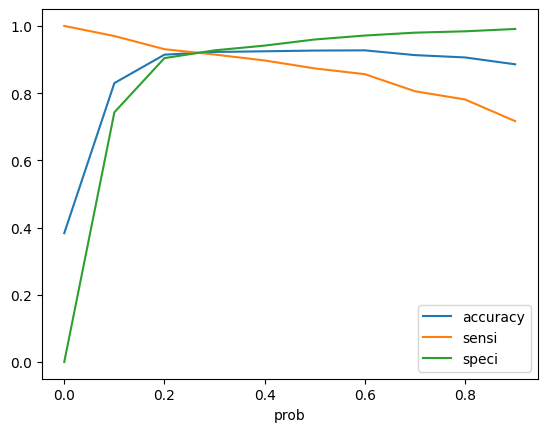

In [80]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [81]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head() 

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
6366,0,0.042850,6366,0,1,0,0,0,0,0,0,0,0,0,0
8007,0,0.025235,8007,0,1,0,0,0,0,0,0,0,0,0,0
8391,1,0.986159,8391,1,1,1,1,1,1,1,1,1,1,1,1
7039,1,0.967212,7039,1,1,1,1,1,1,1,1,1,1,1,1
5196,1,0.984234,5196,1,1,1,1,1,1,1,1,1,1,1,1


In [82]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head() 

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
6366,0,0.042850,6366,0,4
8007,0,0.025235,8007,0,3
8391,1,0.986159,8391,1,99
7039,1,0.967212,7039,1,97
5196,1,0.984234,5196,1,98


In [83]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted) 

0.9225189581272667

In [84]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3469,  272],
       [ 198, 2127]], dtype=int64)

In [85]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [86]:
# Let's see the all other metrics of our logistic regression model

print("Sensitivity: ", TP / float(TP+FN))
print("Specificity: ", TN / float(TN+FP))
print("False Positive Rate: ",FP/ float(TN+FP))
print("Positive Predictive Value: ",TP / float(TP+FP))
print("Negative Predictive Value: ",TN / float(TN+ FN))
print("Precision Score: ",precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted))
print("Recall Score: ",recall_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted))
 

Sensitivity:  0.9148387096774193
Specificity:  0.9272921678695536
False Positive Rate:  0.0727078321304464
Positive Predictive Value:  0.8866194247603167
Negative Predictive Value:  0.9460049086446687
Precision Score:  0.8866194247603167
Recall Score:  0.9148387096774193


#### Precision recall curve

In [87]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

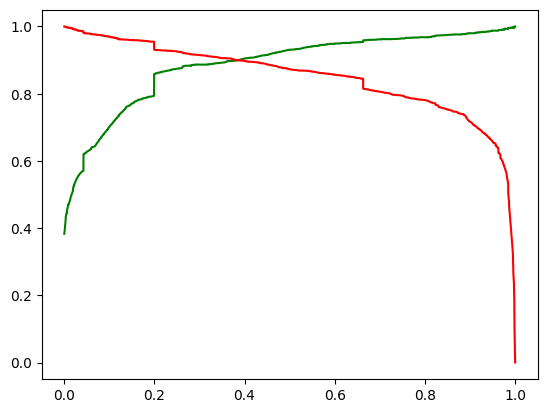

In [88]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### PREDICTIONS ON TEST SET

In [89]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,...,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
486,-0.288133,0.054102,0.371761,-0.373417,-0.660363,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
805,-0.288133,-1.162892,-0.871496,-1.230148,-0.660363,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9056,-0.288133,-1.162892,-0.871496,-1.230148,-0.660363,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5376,-0.288133,-0.351563,1.938229,-0.087840,1.514318,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5410,-0.288133,-0.351563,-0.175492,-0.087840,1.514318,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [90]:
X_test = X_test[ColumnsForModelling]
X_test.head() 

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Modified
486,0.371761,0,0,0,0,0,0,0,1,0,0,1
805,-0.871496,0,1,0,1,0,0,0,0,0,0,0
9056,-0.871496,0,1,0,0,0,0,0,0,0,0,0
5376,1.938229,0,0,0,1,0,0,0,0,0,1,0
5410,-0.175492,0,0,0,0,0,0,0,0,1,0,0


In [91]:
X_test_sm = sm.add_constant(X_test)

In [92]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

486     0.003945
805     0.662881
9056    0.199387
5376    0.999125
5410    0.004994
1872    0.042850
1498    0.141163
7190    0.678156
4540    0.999055
828     0.024799
dtype: float64

In [93]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [94]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [95]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [96]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True) 

In [97]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,486,0.003945
1,1,805,0.662881
2,0,9056,0.199387
3,1,5376,0.999125
4,0,5410,0.004994


In [98]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [99]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,486,0.003945
1,1,805,0.662881
2,0,9056,0.199387
3,1,5376,0.999125
4,0,5410,0.004994


In [100]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [101]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,486,0,0.003945,0
1,805,1,0.662881,66
2,9056,0,0.199387,20
3,5376,1,0.999125,100
4,5410,0,0.004994,0


In [102]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [103]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9219530949634756

In [104]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion3

array([[1528,  121],
       [  82,  870]], dtype=int64)

In [105]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [106]:
# Let's see the all other metrics of our logistic regression model

print("Sensitivity: ", TP / float(TP+FN))
print("Specificity: ", TN / float(TN+FP))
print("False Positive Rate: ",FP/ float(TN+FP))
print("Positive Predictive Value: ",TP / float(TP+FP))
print("Negative Predictive Value: ",TN / float(TN+ FN))

 

Sensitivity:  0.9138655462184874
Specificity:  0.9266221952698606
False Positive Rate:  0.07337780473013948
Positive Predictive Value:  0.8779011099899092
Negative Predictive Value:  0.9490683229813665


The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model

In [107]:
end = time.time()
print(round(end - start,2))

25.51
